# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

 - 설명변수(독립변수): 원인, 종속변수: 결과
 - 종속변수에 영향을 미치는 설명변수가 1개인 경우: 단항회귀, 2개 이상인 경우: 다항회귀

## 선형회귀 모델
$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
$$


- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)


## 손실(loss)함수/오차(error)함수/비용(cost)함수/목적(objective)함수

- 모델이 출력한 예측값과 실제 값 사이의 차이를 계산하는 함수
- 평가 지표로 사용되기도 하고 모델을 최적화하는데 사용된다.

## 최적화(Optimize)

- 손실함수의 값이 최소화 되도록 모델을 학습하는 과정.
- 최적화의 두가지 방법
    - 정규방정식
    - 경사하강법

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유의 주택가격(중앙값) (단위: $1,000)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston=load_boston()
X, y = boston.data, boston.target

In [4]:
df=pd.DataFrame(X, columns=boston.feature_names)
df['PRICE']=y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [12]:
# 훈련/테스트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y)

In [16]:
# 선형모델은 feature간 scale에 영향을 많이 받는다. - (선형모델, KNN, SVM)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
# 평가지표 출력함수
from sklearn.metrics import mean_squared_error, r2_score
def print_metrics(y, pred, title=None):
    mse=mean_squared_error(y, pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y, pred)
    if title:
        print(title)
    print(f'MSE:{mse}, RMSE:{rmse}, R^2:{r2}')

## LinearRegression
- 가장 기본적인 선형 회귀 모델

In [26]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_train=lr.predict(X_train_scaled)
pred_test=lr.predict(X_test_scaled)

In [27]:
y_train[:5]

array([20.6, 19.9, 28.4, 23.9, 25. ])

In [28]:
pred_train[:5]

array([15.67213619, 19.17019804, 30.69986452, 27.56609604, 28.20464848])

In [33]:
print_metrics(y_train, pred_train, "train")

train
MSE:387.84388269180135, RMSE:19.69375237713223, R^2:-3.474945422308248


In [34]:
print_metrics(y_test, pred_test, "test")

test
MSE:388.2745287416708, RMSE:19.704682914009826, R^2:-3.9998028606919362


In [39]:
# 가중치 조회
weights=lr.coef_
weights

array([-1.00281999e+00,  9.60624283e-01, -5.57518062e-04,  7.25318817e-01,
       -2.03411536e+00,  2.78708920e+00, -5.85255905e-02, -3.19619044e+00,
        2.31259757e+00, -1.82360972e+00, -2.04814809e+00,  6.87347978e-01,
       -3.75229281e+00])

In [40]:
weights_ser=pd.Series(weights, index=boston.feature_names)
weights_ser

CRIM      -1.002820
ZN         0.960624
INDUS     -0.000558
CHAS       0.725319
NOX       -2.034115
RM         2.787089
AGE       -0.058526
DIS       -3.196190
RAD        2.312598
TAX       -1.823610
PTRATIO   -2.048148
B          0.687348
LSTAT     -3.752293
dtype: float64

In [41]:
intercept=lr.intercept_   # 절편
intercept

22.47097625329816

## 규제 (Regularization)
- 선형 회귀 모델에서 과적합 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용하는 것.
- 입력데이터의 Feature들이 너무 많은 경우 과적합이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 과적합이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들을 제한한다.
    

## Ridge Regression
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Normm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{w_{i}^{2}}
$$
 
- $\text{MSE}(w)$ : 오차를 줄여주는 역할
- $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ : 과적합을 줄여주는 역할
    - 𝛼 값이 작을수록 규제가 약해진다.

In [43]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
pred_train=ridge.predict(X_train_scaled)
pred_test=ridge.predict(X_test_scaled)

In [45]:
print_metrics(y_train, pred_train)

MSE:141.96534990118988, RMSE:11.914921313260523, R^2:-0.6379971968554856


In [47]:
print_metrics(y_test, pred_test)

MSE:136.99978698077277, RMSE:11.704690810985687, R^2:-0.7641433474416324


## 규제 alpha 에 따른 weight 변화

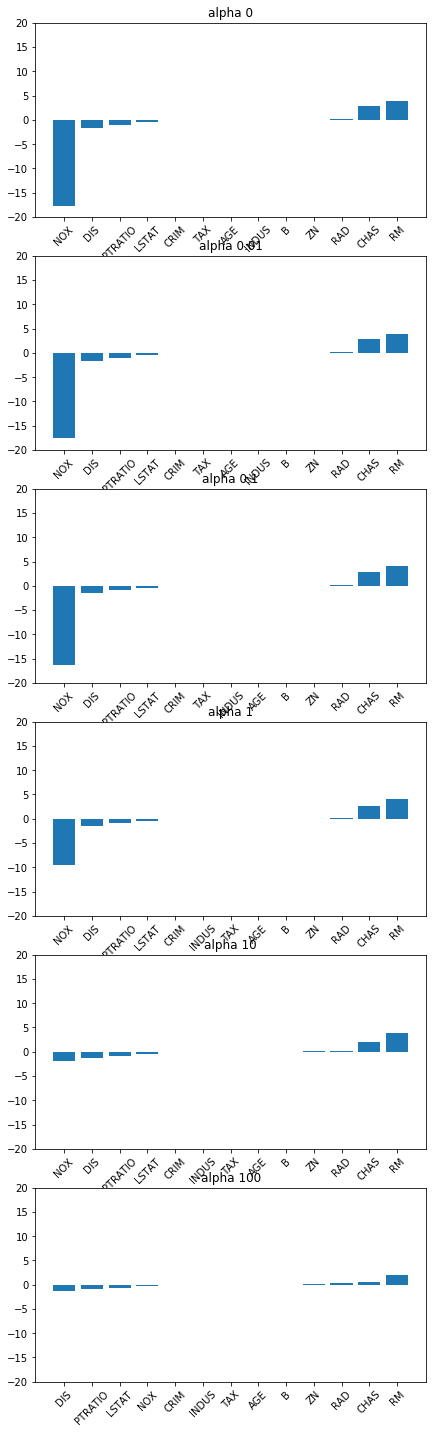

In [57]:
alpha_list=[0,0.01,0.1,1,10,100]

w_df=pd.DataFrame()
plt.figure(figsize=(7,25), facecolor='w')

for idx, alpha in enumerate(alpha_list):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    w=pd.Series(ridge.coef_, index=boston.feature_names)#.sort_values()
    w_df[f'alpha {alpha}']=w
    
    plt.subplot(6,1,idx+1)
    
    w_sort=w.sort_values()
    plt.bar(x=w_sort.index, height=w_sort)
    plt.xticks(rotation=45)
    plt.ylim(-20,20)
    plt.title(f'alpha {alpha}')

In [53]:
w_df

,alpha 0,alpha 0.01,alpha 0.1,alpha 1,alpha 10,alpha 100
CRIM,-0.119251,-0.119217,-0.118935,-0.117470,-0.116343,-0.111797
ZN,0.042341,0.042385,0.042753,0.044836,0.048739,0.055612
INDUS,-0.000081,-0.000729,-0.006099,-0.035123,-0.068768,-0.082678
CHAS,2.772909,2.771938,2.763127,2.672637,1.986265,0.580536
NOX,-17.675712,-17.523891,-16.266579,-9.475603,-1.843427,-0.198456
RM,3.959372,3.960846,3.972746,4.019602,3.767852,2.092832
AGE,-0.002129,-0.002263,-0.003368,-0.009140,-0.012263,0.006034
DIS,-1.595156,-1.592808,-1.573378,-1.468910,-1.355508,-1.224840
RAD,0.265722,0.265357,0.262345,0.246956,0.242964,0.287225
TAX,-0.010753,-0.010767,-0.010878,-0.011511,-0.012745,-0.014654


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [58]:
from sklearn.linear_model import Lasso

## 규제 alpha 에 따른 weight 변화

C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4149.728756115841, tolerance: 3.284796073878628
  positive)


train
MSE:21.898304781613938, RMSE:4.6795624562146765, R^2:0.7473372067681562
test
MSE:22.24457977565057, RMSE:4.716415988401635, R^2:0.713557018644444
----------------------------------------------------------------
train
MSE:21.902875951395405, RMSE:4.6800508492318125, R^2:0.7472844645793502
test
MSE:22.253736781498, RMSE:4.717386647445596, R^2:0.7134391040746171
----------------------------------------------------------------
train
MSE:22.3377446407849, RMSE:4.726282327663562, R^2:0.7422669466095357
test
MSE:22.79417682715157, RMSE:4.774324750909972, R^2:0.70647986908424
----------------------------------------------------------------
train
MSE:28.333040696937086, RMSE:5.322878985749825, R^2:0.673093178918116
test
MSE:28.223339614000864, RMSE:5.312564316222521, R^2:0.6365686551789069
----------------------------------------------------------------
train
MSE:86.67008110497699, RMSE:9.309676745460981, R^2:0.0
test
MSE:77.71865427407687, RMSE:8.81581841204076, R^2:-0.000781460550527635

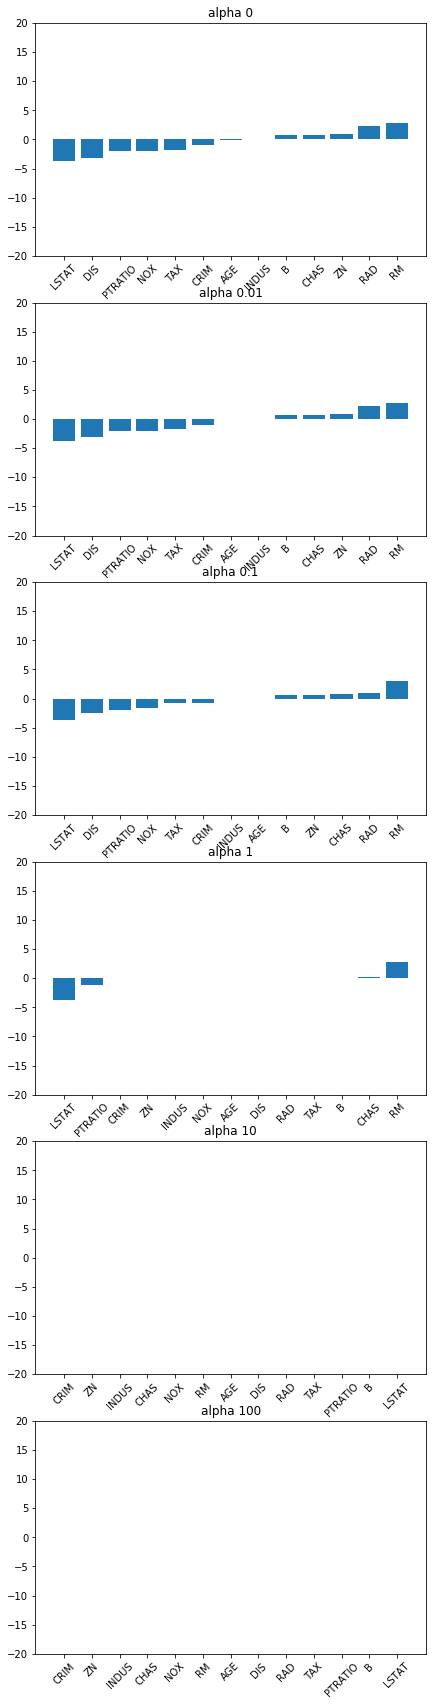

In [69]:
alpha_list=[0,0.01,0.1,1,10,100]
w_df=pd.DataFrame()

plt.figure(figsize=(7,30), facecolor='w')
for idx, alpha in enumerate(alpha_list, start=1):
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    w=pd.Series(lasso.coef_, index=boston.feature_names)
    w_df[f'alpha {alpha}']=w
    
    w_sort=w.sort_values()
    plt.subplot(len(alpha_list), 1, idx)
    plt.bar(x=w_sort.index, height=w_sort)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.title(f'alpha {alpha}')
    
    pred_train=lasso.predict(X_train_scaled)
    pred_test=lasso.predict(X_test_scaled)
    print_metrics(y_train, pred_train, "train")
    print_metrics(y_test, pred_test,"test")
    print('----------------------------------------------------------------')

In [64]:
w_df

,alpha 0,alpha 0.01,alpha 0.1,alpha 1,alpha 10,alpha 100
CRIM,-1.002820,-0.970609,-0.688873,-0.000000,-0.0,-0.0
ZN,0.960624,0.930042,0.639356,0.000000,0.0,0.0
INDUS,-0.000558,-0.008433,-0.079139,-0.000000,-0.0,-0.0
CHAS,0.725319,0.726607,0.742604,0.161369,0.0,0.0
NOX,-2.034115,-1.993013,-1.587996,-0.000000,-0.0,-0.0
RM,2.787089,2.799800,2.940989,2.841972,0.0,0.0
AGE,-0.058526,-0.039065,-0.000000,-0.000000,-0.0,-0.0
DIS,-3.196190,-3.118506,-2.465649,-0.000000,0.0,0.0
RAD,2.312598,2.173506,0.920046,-0.000000,-0.0,-0.0
TAX,-1.823610,-1.712211,-0.710466,-0.000000,-0.0,-0.0


In [70]:
# 교차검증
from sklearn.model_selection import cross_val_score

In [77]:
score=cross_val_score(Lasso(alpha=1), X,y, cv=3, scoring='neg_mean_squared_error')
score

array([-21.43350386, -57.36188333, -64.6815532 ])

In [78]:
score*-1  # 원래 값

array([21.43350386, 57.36188333, 64.6815532 ])

## 확률적 경사하강법을 사용한 회귀처리
 - SGDRegressor, SGDClassifier
 - 순간변화율(미분계수)이 0이 되도록 가중치를 구한다.

In [3]:
from sklearn.datasets import make_regression
X, y=make_regression(n_samples=100,
                    n_features=1,
                    n_informative=1,
                    noise=50,
                    random_state=1)

In [4]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [5]:
lr=LinearRegression()  # 방정식을 이용한 풀이
lr.fit(X,y)
lr.coef_, lr.intercept_

(array([85.14546889]), 10.135071944054275)

In [7]:
# max_iter: 반복횟수 - epoch(기본값: 1000)
# eta0: 학습률(기본값: 0.01)
# penalty: 규제방식('L1'-Lasso, 'L2'-Ridge(기본값), 'elasticnet'(L1,L2를 합친 것), None)
# alpha: 규제강도(기본값: 0.0001)

sgd=SGDRegressor(verbose=1)  # verbose: iteration마다 상황을 보여줌
sgd.fit(X,y)
sgd.coef_, sgd.intercept_

-- Epoch 1
Norm: 25.36, NNZs: 1, Bias: 6.355547, T: 100, Avg. loss: 3059.497670
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 37.50, NNZs: 1, Bias: 8.089313, T: 200, Avg. loss: 2193.965822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 46.12, NNZs: 1, Bias: 9.094447, T: 300, Avg. loss: 1790.771253
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 52.63, NNZs: 1, Bias: 9.712881, T: 400, Avg. loss: 1551.054114
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 57.72, NNZs: 1, Bias: 10.157162, T: 500, Avg. loss: 1399.150647
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 61.85, NNZs: 1, Bias: 10.441023, T: 600, Avg. loss: 1297.457986
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 65.19, NNZs: 1, Bias: 10.536623, T: 700, Avg. loss: 1227.438679
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 67.95, NNZs: 1, Bias: 10.614551, T: 800, Avg. loss: 1178.805924
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 70.30, NNZs: 1, Bias: 10.671394, T: 900, Avg. loss: 1143.91

(array([84.9597293]), array([10.09695129]))

In [8]:
from sklearn.metrics import r2_score, mean_squared_error

pred=sgd.predict(X)
r2_score(y, pred), mean_squared_error(y, pred)

(0.7320986076908162, 2078.576747123033)